In [1]:
Link = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"

In [2]:
import requests
import csv
import pandas as pd

In [3]:
def get_data_as_df(link):
    with requests.get(link, stream=True) as r:
        lines = (line.decode('utf-8') for line in r.iter_lines())
        data = []
        for row in csv.reader(lines):
            data.append(row)
    df = pd.DataFrame(data)
    df.columns = df.loc[0]
    df.drop(index=0, axis=0, inplace=True)
    return df

In [4]:
df = get_data_as_df(Link)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100
2,JHMZC5F37M,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035090400
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803
4,1N4AZ0CP5D,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005804
5,5YJSA1E21H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012226


In [5]:
df.shape

(130443, 17)

In [7]:
df1 = df.copy()

In [8]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
df1["clean_fuel"] = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != "Clean Alternative Fuel Vehicle Eligible"

In [9]:
df1.loc[df1["clean_fuel"] == True]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,clean_fuel
7,3FA6P0PU1G,Thurston,Tumwater,WA,98501,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010802,True
8,WA1F2AFY8P,Thurston,Lacey,WA,98516,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012225,True
9,1FADP5CU0E,Thurston,Rochester,WA,98579,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,53067012710,True
12,7SAYGDEF4N,Yakima,Yakima,WA,98908,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14,187486883,POINT (-120.56916 46.58514),PACIFICORP,53077002804,True
15,1FADP5FU4H,Thurston,Lacey,WA,98513,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,53067011623,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,WBA13AG06M,Thurston,Olympia,WA,98501,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,22,196559310,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010700,True
130439,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072405,True
130440,1N4BZ1CV7N,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063100,True
130441,5YJYGDEE8M,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007002,True


In [10]:
# Get all TESLA cars with the model year, and model type made in Bellevue City
df1["bellevue_city"] = df["City"] == "Bellevue"
df1.loc[df1["bellevue_city"] == True]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,clean_fuel,bellevue_city
126,5YJ3E1EC4M,King,Bellevue,WA,98006,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,180688847,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024905,True,True
131,5YJSA1E25L,King,Bellevue,WA,98005,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330,0,41,103194346,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023603,False,True
139,5YJSA1E23L,King,Bellevue,WA,98006,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330,0,41,8740938,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025001,False,True
143,5YJ3E1EB0N,King,Bellevue,WA,98004,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,187579675,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024001,True,True
162,WBA33AG09N,King,Bellevue,WA,98005,2022,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,41,193976023,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023500,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130109,5YJSA1E69N,King,Bellevue,WA,98004,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,205837019,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023807,True,True
130187,7SAXCDE5XN,King,Bellevue,WA,98005,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,218176493,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023601,True,True
130219,5YJYGDEF4M,King,Bellevue,WA,98007,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48,178923510,POINT (-122.12053 47.61334),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023603,True,True
130286,7SAYGDEE6N,King,Bellevue,WA,98027,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41,220161672,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025008,True,True


In [11]:
# Get all the cars that have an electric range of more than 100, and were made after
# 2015
df["Electric Range"] = df["Electric Range"].astype(int)
df["Model Year"] = df["Model Year"].astype(int)

In [12]:
df1["range_100"] = df["Electric Range"] > 100
df1["year_2015"] = df["Model Year"] > 2015

In [13]:
df1.loc[(df1["range_100"] & df1["year_2015"]) == True]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,clean_fuel,bellevue_city,range_100,year_2015
1,5YJXCAE26J,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,14,141151601,POINT (-120.56916 46.58514),PACIFICORP,53077001100,False,False,True,True
3,5YJ3E1EB0K,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,36,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033005803,False,False,True,True
5,5YJSA1E21H,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,22,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012226,False,False,True,True
13,5YJ3E1EC7L,Thurston,Lacey,WA,98503,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,22,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,53067011422,False,False,True,True
14,5YJ3E1EB2L,Thurston,Olympia,WA,98516,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,22,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012221,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130418,5YJYGDEE5L,Pierce,Tacoma,WA,98444,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,29,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053063502,False,False,True,True
130429,1N4AZ1CP0J,Clallam,Sequim,WA,98382,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,24,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53009002001,False,False,True,True
130433,5YJYGDEEXL,King,Vashon,WA,98070,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,34,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702,False,False,True,True
130437,5YJ3E1EB0J,Whatcom,Blaine,WA,98230,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,42,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,53073010405,False,False,True,True


In [14]:
# Draw plots to show the distribution between city and electric vehicle type
df.groupby("City")["Electric Vehicle Type"].count()


City
                  3
Aberdeen        115
Acme              7
Addy              2
Aiea              1
               ... 
Yacolt           32
Yakima          471
Yarrow Point    126
Yelm            197
Zillah           23
Name: Electric Vehicle Type, Length: 657, dtype: int64

In [15]:
top_20 = df.groupby("City")["Electric Vehicle Type"].count().sort_values(ascending=False)[:20]

In [16]:
x = list(dict(top_20).keys())
y = list(dict(top_20).values())

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

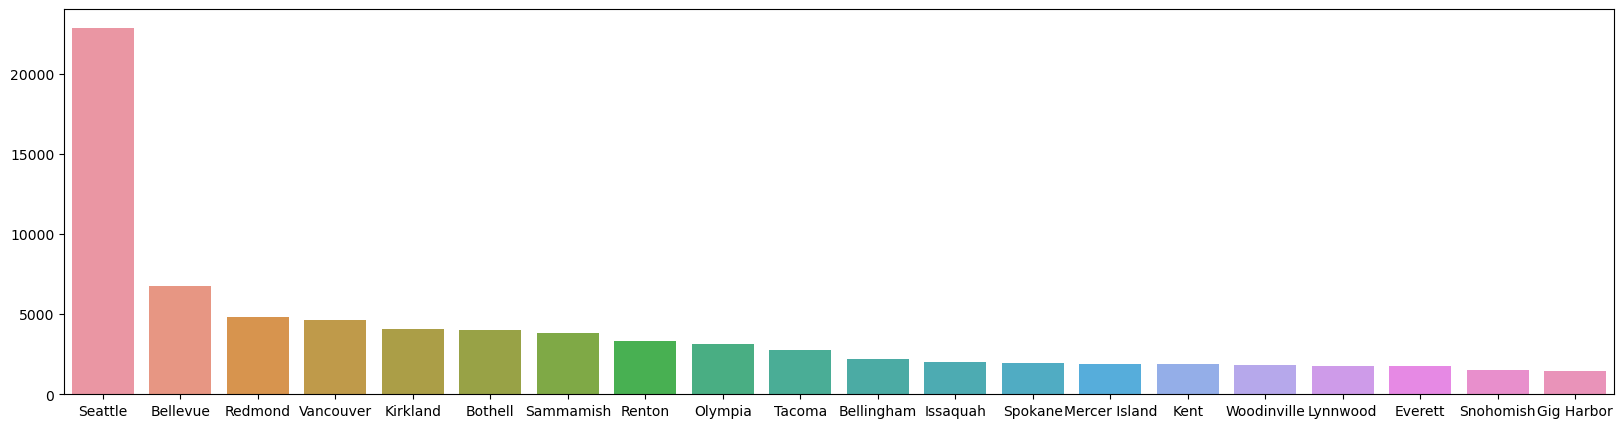

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=x, y=y)